### IDs:
Insert yours IDs to the cell below

ID #1: 300420379

ID #2: Ben approved submitting alone


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Defective products

In a manufacturing pipeline products are 1% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 75% probability of having at least one defective product in the batch sent?
Write a function that computes this.

In [56]:
from scipy.stats import binom

def func1(proba,p_defective,k,limit=1000000):
    n = 0
    k= k -1
    for n in range(limit):
        if 1-binom.cdf(k,n,p_defective) > proba:
            return n
    return -1

proba = 0.75
p_defective = 0.01
at_least_X_defective = 1
func1(proba,p_defective,at_least_X_defective)

138

Answer: 138 products

#### Answer the same question but where:
#### 1.B.1 
Products are 4% defective and we want a 95% probability of at least one defective product in the batch

In [57]:
proba = 0.95
p_defective = 0.04
at_least_X_defective = 1
func1(proba,p_defective,at_least_X_defective)

74

Answer: 74 products

#### 1.B.2
Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch

In [58]:
proba = 0.9
p_defective = 0.1
at_least_X_defective = 5
func1(proba,p_defective,at_least_X_defective)

78

Answer: 78 products

#### 1.B.3
Products are 20% defective and we want a 90% probability of at least 10 defective products in the batch

In [59]:
proba = 0.9
p_defective = 0.2
at_least_X_defective = 10
func1(proba,p_defective,at_least_X_defective)

69

Answer: 69 products

#### 1.C
Can you comment on the difference between the answer 1.B.2 and that of 1.B.3?

##### Answer: 

Intuitively we assume to get an equal result in B2 & B3. 
That's due to the ratio 2:1 of the percentege, and the reverse ratio of the minimal number of defective product 1:2.

But this is not the case! 
we could see that result(B2)>result(B3).
And it's actually it makes sense to me :))

### Question 2 - Formula

#### 2.A
Prove (you can use what you learned in class. In particular - linearity of variance for independent random variables):

$$g(n,p) = \sum_{k=0}^{n} {n \choose k} k^2 p^k (1-p)^{(n-k)} = np\big(1+p(n-1)\big)$$

Step I: Define a random Variable with a Binomial Distribution
$$ E\big(G\big) = np $$

Step II:
$$ E\big(G^2\big) = \sum_{k=0}^{n} g^2 f(g) = \sum_{k=0}^{n} {n \choose k} k^2 p^k (1-p)^{(n-k)} $$

Step III:
$$ E\big(G(G-1)\big) = \sum_{k=0}^{n} g(g-1)f(g) = $$
$$ = \sum_{k=0}^{n} g(g-1)\big[{n \choose k} p^k (1-p)^{(n-k)}\big] = $$
$$ = \sum_{k=0}^{n} g(g-1) \dfrac{n!}{k!(n-k)!} p^k (1-p)^{(n-k)} = $$ 
$$ = 0 + 0 + \sum_{k=2}^{n} \dfrac{n!}{(k-2)!(n-k)!} p^k (1-p)^{(n-k)} = $$
$$ = \sum_{k=2}^{n} \dfrac{n(n-1(n-2)!}{(k-2)!(n-k)!} p^k (1-p)^{(n-k)} = $$
$$ define: k = t+2 $$
$$ = \sum_{t=0}^{n-2} \dfrac{n(n-1)(n-2)!}{t!(n-t-2)!} p^2p^{t} (1-p)^{(n-t-2)} = $$
$$ = n(n-1)p^2\sum_{t=0}^{n-2} \dfrac{(n-2)!}{t!(n-2)-t)!} p^{t} (1-p)^{((n-2)-t)} = $$
$$ using \space Binomial \space Theorem \space on \space (n-2) $$
$$ = n(n-1)p^2 \big(p+(1-p)\big)^{n-2} = n(n-1)p^2 1^{n-2} = np^2(n-1) $$

Step IV:
$$ E\big(G^2\big) = E\big(GG\big) = E\big(GG+G-G\big) = E\big(GG-G\big) + E\big(G\big) = E\big(G(G-1)\big) + E\big(G\big)$$
$$ \sum_{k=0}^{n} {n \choose k} k^2 p^k (1-p)^{(n-k)} = np^2(n-1) + np = np\big(p(n-1)+1\big) =  np\big(1+p(n-1)\big) $$

#### 2.B
Use this formula to compute  (n = 5000, p = 0.1, 0.2, 0.3). What is the complexity of this calculation, in terms of n?

In [67]:
from math import pow
from scipy.special import perm

n = 5000
proba = [0.1,0.2,0.3]

for p in proba:
    print('Result for n={0} and p={1} is equal to {2}'.format(n,p,round(n*p*(1+p*(n-1)))))

Result for n=5000 and p=0.1 is equal to 250450
Result for n=5000 and p=0.2 is equal to 1000800
Result for n=5000 and p=0.3 is equal to 2251050


$$ Complexity = O(1) $$

#### 2.C
Consider the function:
$$f(n,p) = \sum_{k=0}^{n} {n \choose k} k^3 p^k (1-p)^{(n-k)}$$

Describe how $f(n,p)$ can be computed using a process that requires a constant number of multiplications and additions, regardless of n.
Use your process to compute the values of $f(n=10000, p=0.05, 0.1, 0.2, 0.3)$ in O(1).<br>
Explain all your steps. 
 

Step I:
Define F a random Variable with a Binomial Distribution $$ E(F) = np$$

Step II: (proof on 2.A)
$$ E(F^2) = np^2(n-1) + np $$

Step III: (proof on 2.A)
$$ E(2F^2) = 2np^2(n-1) + 2np $$

Step III:
$$ E(F^3) = \sum_{k=0}^{n} {n \choose k} k^3 p^k (1-p)^{(n-k)} $$

Step IV:
$$ E\big(F(F-1(F-2))\big) = \sum_{k=0}^{n} f(f-1)(f-2)*f(f) = $$
$$ = \sum_{k=0}^{n} f(f-1)(f-2)\big[{n \choose k} p^k (1-p)^{(n-k)}\big] = $$
$$ = \sum_{k=0}^{n} f(f-1)(f-2) \dfrac{n!}{k!(n-k)!} p^k (1-p)^{(n-k)} = $$ 
$$ = 0 + 0 + 0 + \sum_{k=3}^{n} \dfrac{n!}{(k-3)!(n-k)!} p^k (1-p)^{(n-k)} = $$
$$ = \sum_{k=3}^{n} \dfrac{n(n-1(n-2)(n-3)!}{(k-3)!(n-k)!} p^k (1-p)^{(n-k)} = $$
$$ define: k = t+3 $$
$$ = \sum_{t=0}^{n-3} \dfrac{n(n-1)(n-2)(n-3)!}{t!(n-t-3)!} p^3p^{t} (1-p)^{(n-t-3)} = $$
$$ = n(n-1)(n-2)p^3\sum_{t=0}^{n-3} \dfrac{(n-3)!}{t!(n-3)-t)!} p^{t} (1-p)^{((n-3)-t)} = $$
$$ using \space Binomial \space Theorem \space on \space (n-3) $$
$$ = n(n-1)(n-2)p^3 \big(p+(1-p)\big)^{n-3} = $$
$$ = n(n-1)(n-2)p^3 1^{n-3} = $$ 
$$ = np^3(n-1)(n-2) $$

Step V:
$$ E\big(F^3\big) = E\big(F^3-3F^2+3F^2-2F+2F\big) = $$
$$ = E\big(F^3-3F^2+2F\big)+E\big(3F^2\big)-E\big(2F\big) = $$ 
$$ = E\big(F^3-3F^2+2F\big)+3E\big(F^2\big)-2E\big(F\big) = $$ 
$$ = E\big(F(F-1)(F-2)\big) + 3E\big(F^2\big)-2E\big(F\big) = $$ 
$$ = [np^3(n-1)(n-2)] + 3[np^2(n-1) + np] - 2[np] = $$
$$ = np^3(n-1)(n-2) + 3n^2p^2-3np^2 + 3np - 2np = $$
$$ = np^3(n-1)(n-2) + 3n^2p^2-3np^2 + np = $$
$$ = np^3(n^2-3n+2) + 3n^2p^2-3np^2 + np = $$
$$ = n^3p^3-3n^2p^3 + 2np^3 + 3n^2p^2-3np^2 + np$$

In [1]:
from math import pow
from scipy.special import perm

n = 10000
proba = [0.05,0.1,0.2,0.3]

for p in proba:
    print('Result for n={0} and p={1} is equal to {2}'.format(n,p,round(pow(n,3)*pow(p,3) - 3*pow(n,2)*pow(p,3) + 2*n*pow(p,3) + 3*pow(n,2)*pow(p,2) - 3*n*pow(p,2) + n*p)))

Result for n=10000 and p=0.05 is equal to 125712928
Result for n=10000 and p=0.1 is equal to 1002700720
Result for n=10000 and p=0.2 is equal to 8009600960
Result for n=10000 and p=0.3 is equal to 27018900840


### Question 3 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 
The population of SH and RG is 12K and 18K respectively. <br>
Here are some findings of the survey:
* The mean rent in SH and RG is 5100RCU and 3700RCU respectively.
* The median rent is 4000RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 3.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

In [16]:
import numpy as np
import scipy as sp
from scipy.stats import iqr

SH = {}
SH['population'] = 12000
SH['MEAN'] = 5100
SH['MEDIAN'] = 4000
SH['LOW'] = 1500
SH['HIGH'] = 8000

# Create SH First scenario
SH['low1'] = np.random.randint(low=SH['LOW'],high=SH['MEDIAN'],size=int(SH['population']/2)-1)
SH['high1'] = np.random.randint(low=SH['MEDIAN'],high=SH['HIGH'],size=int(SH['population']/2)-1)
# set the median
SH['values1'] = np.concatenate([SH['low1'],[SH['MEDIAN'],SH['MEDIAN']],SH['high1']])
# adjust the mean
SH['high1'] = SH['high1'] + 2*(SH['MEAN']-np.mean(SH['values1']))
SH['values1'] = np.concatenate([SH['low1'],[SH['MEDIAN'],SH['MEDIAN']],SH['high1']])


# Create SH Second scenario
SH['low2'] = np.random.randint(low=SH['LOW'],high=SH['MEDIAN'],size=int(SH['population']/2)-1)
SH['high2'] = np.random.randint(low=SH['MEDIAN'],high=SH['HIGH'],size=int(SH['population']/2)-1)
# set the median
SH['values2'] = np.concatenate([SH['low2'],[SH['MEDIAN'],SH['MEDIAN']],SH['high2']])
# adjust the mean
SH['high2'] = SH['high2'] + 2*(SH['MEAN']-np.mean(SH['values2']))
SH['values2'] = np.concatenate([SH['low2'],[SH['MEDIAN'],SH['MEDIAN']],SH['high2']])



RG = {}
RG['population'] = 18000
RG['MEAN'] = 3700
RG['MEDIAN'] = 4000
RG['LOW'] = 100
RG['HIGH'] = 10000

# Create RG First scenario
RG['low1'] = np.random.randint(low=RG['LOW'],high=0.1*RG['MEDIAN'],size=int(RG['population']/2)-1)
RG['high1'] = np.random.randint(low=RG['MEDIAN'],high=RG['HIGH'],size=int(RG['population']/2)-1)
# set the median
RG['values1'] = np.concatenate([RG['low1'],[RG['MEDIAN'],RG['MEDIAN']],RG['high1']])
# adjust the mean
RG['high1'] = RG['high1'] + 2*(RG['MEAN']-np.mean(RG['values1']))
RG['values1'] = np.concatenate([RG['low1'],[RG['MEDIAN'],RG['MEDIAN']],RG['high1']])


# Create RG Second scenario
RG['low2'] = np.random.randint(low=RG['LOW'],high=0.1*RG['MEDIAN'],size=int(RG['population']/2)-1)
RG['high2'] = np.random.randint(low=RG['MEDIAN'],high=RG['HIGH'],size=int(RG['population']/2)-1)
# set the median
RG['values2'] = np.concatenate([RG['low2'],[RG['MEDIAN'],RG['MEDIAN']],RG['high2']])
# adjust the mean
RG['high2'] = RG['high2'] + 2*(RG['MEAN']-np.mean(RG['values2']))
RG['values2'] = np.concatenate([RG['low2'],[RG['MEDIAN'],RG['MEDIAN']],RG['high2']])


print('RG1 Mean={0} Median={1} IQR={2}'.format(round(np.mean(RG['values1'])),round(np.median(RG['values1'])),round(iqr(RG['values1']))))
print('SH1 Mean={0} Median={1} IQR={2}'.format(round(np.mean(SH['values1'])),round(np.median(SH['values1'])),round(iqr(SH['values1']))))
print()
print('RG2 Mean={0} Median={1} IQR={2}'.format(round(np.mean(RG['values2'])),round(np.median(RG['values2'])),round(iqr(RG['values2']))))
print('SH2 Mean={0} Median={1} IQR={2}'.format(round(np.mean(SH['values2'])),round(np.median(SH['values2'])),round(iqr(SH['values2']))))

RG1 Mean=3700.0 Median=4000.0 IQR=6907.0
SH1 Mean=5100.0 Median=4000.0 IQR=4705.0

RG2 Mean=3700.0 Median=4000.0 IQR=6919.0
SH2 Mean=5100.0 Median=4000.0 IQR=4705.0


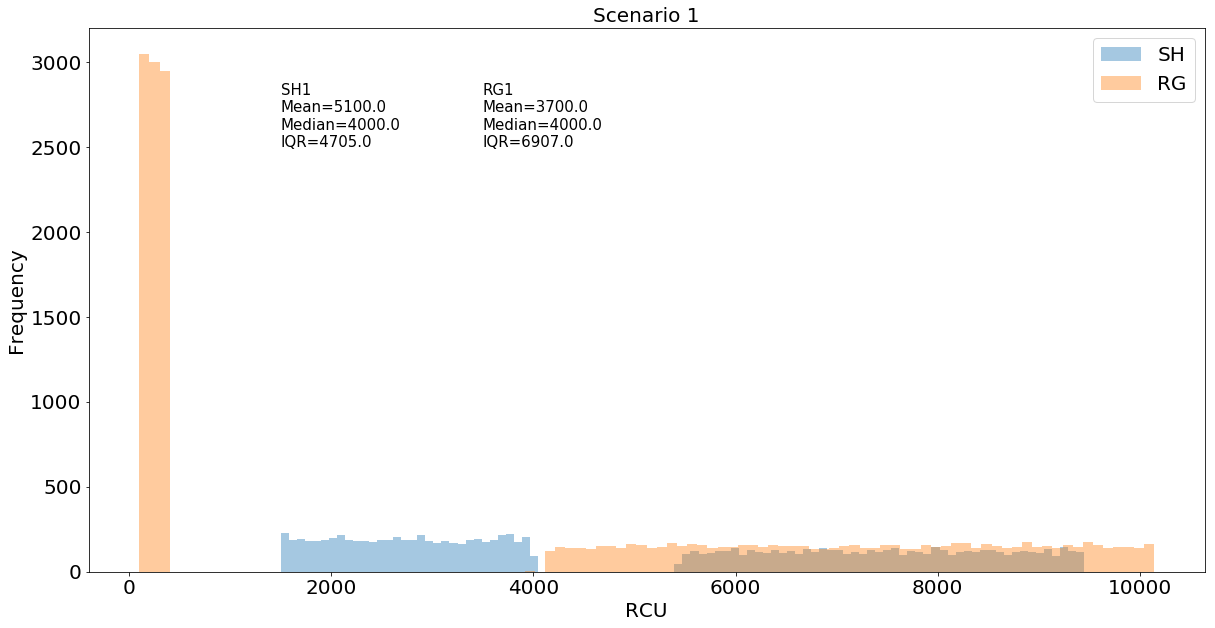

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

bins = max(int((np.max(SH['values1'])-np.min(SH['values1']))/100),int((np.max(RG['values1'])-np.min(RG['values1']))/100))
s1 = sns.distplot(SH['values1'],kde=False,bins=bins,label='SH')
s2 = sns.distplot(RG['values1'],kde=False,bins=bins,label='RG')

rg = 'RG1\nMean={0}\nMedian={1}\nIQR={2}'.format(round(np.mean(RG['values1'])),round(np.median(RG['values1'])),round(iqr(RG['values1'])))
sh = 'SH1\nMean={0}\nMedian={1}\nIQR={2}'.format(  round(np.mean(SH['values1'])),round(np.median(SH['values1'])),round(iqr(SH['values1'])) )
plt.text(x=1500, y=2500, s=sh, fontsize=15)
plt.text(x=3500, y=2500, s=rg, fontsize=15)

plt.rc('font', size=20) 
plt.xlabel('RCU',size=20)
plt.ylabel('Frequency',size=20) 
plt.title('Scenario 1',size=20)
plt.legend()
plt.show()

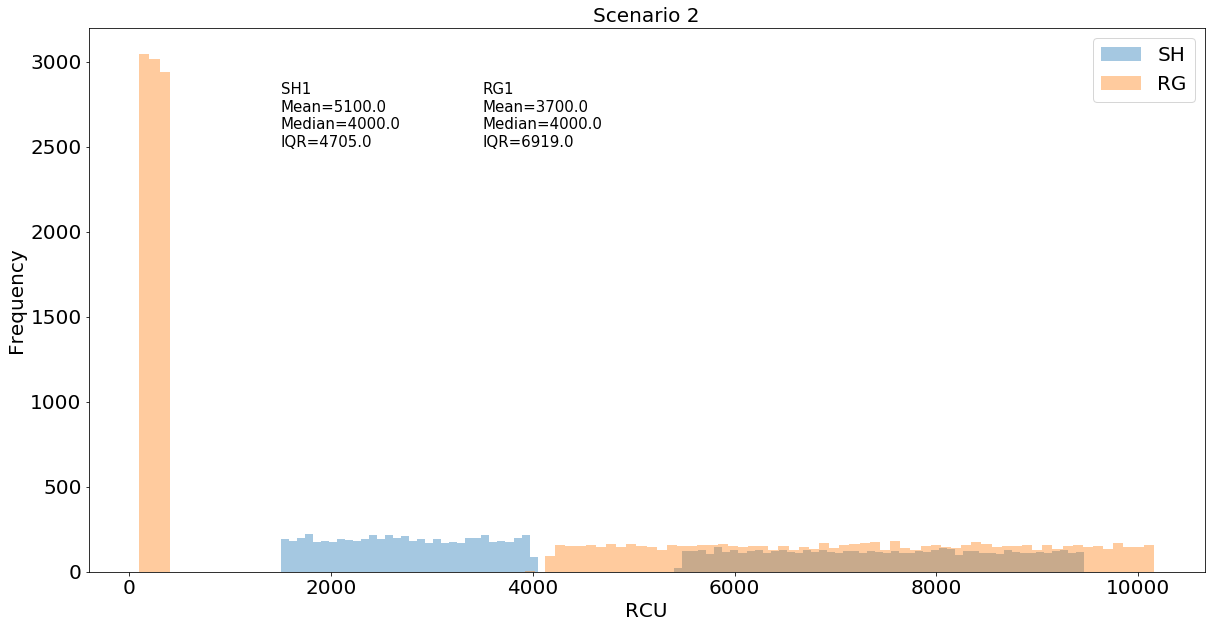

In [18]:
plt.figure(figsize=(20, 10))

bins = max(int((np.max(SH['values2'])-np.min(SH['values2']))/100),int((np.max(RG['values2'])-np.min(RG['values2']))/100))
s1 = sns.distplot(SH['values2'],kde=False,bins=bins,label='SH')
s2 = sns.distplot(RG['values2'],kde=False,bins=bins,label='RG')

rg = 'RG1\nMean={0}\nMedian={1}\nIQR={2}'.format(round(np.mean(RG['values2'])),round(np.median(RG['values2'])),round(iqr(RG['values2'])))
sh = 'SH1\nMean={0}\nMedian={1}\nIQR={2}'.format(  round(np.mean(SH['values2'])),round(np.median(SH['values2'])),round(iqr(SH['values2'])) )
plt.text(x=1500, y=2500, s=sh, fontsize=15)
plt.text(x=3500, y=2500, s=rg, fontsize=15)

plt.rc('font', size=20) 
plt.xlabel('RCU',size=20)
plt.ylabel('Frequency',size=20) 
plt.title('Scenario 2',size=20)
plt.legend()
plt.show()

#### 3.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG 

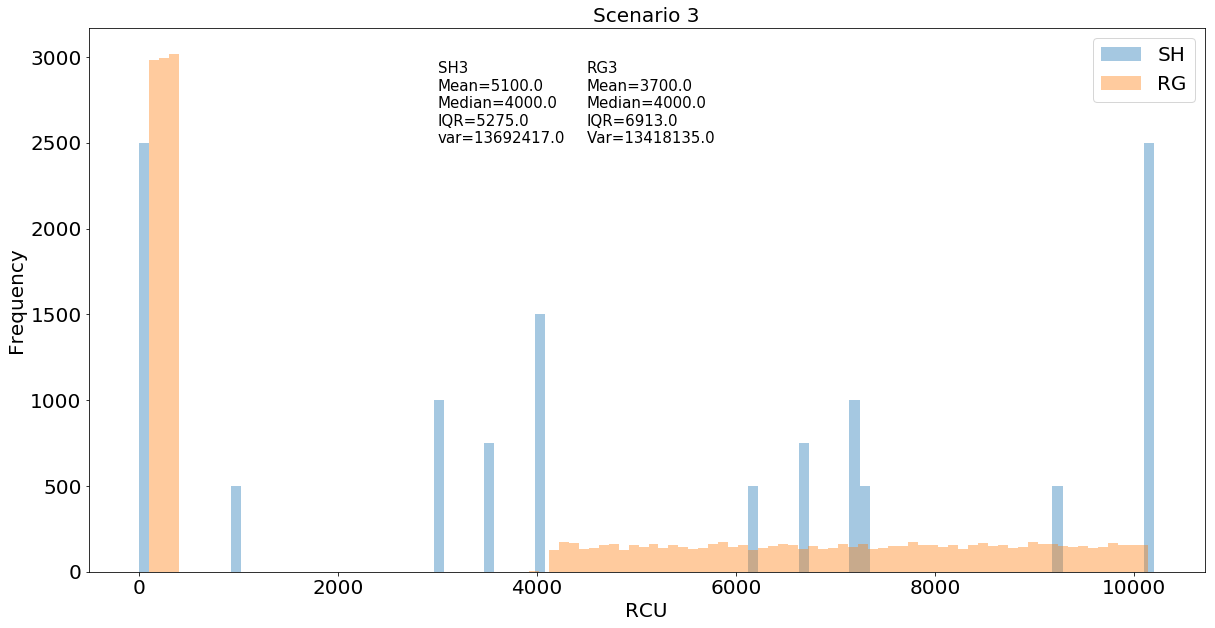

In [48]:
import numpy as np
import scipy as sp
from scipy.stats import iqr

# Create SH Third scenario
# a1 = [1 for i in range(2000)]
# a2 = [1000 for i in range(500)]
# a3 = [3000 for i in range(1000)]
# a4 = [3500 for i in range(750)]
# a5 = [4000 for i in range(1000)]
# a6 = [7300 for i in range(500)]
# a7 = [6700 for i in range(750)]
# a8 = [7200 for i in range(1000)]
# a9 = [9200 for i in range(500)]
# a10 = [10199 for i in range(2000)]
a1 = [1 for i in range(2500)]
a2 = [1000 for i in range(500)]
a3 = [3000 for i in range(1000)]
a4 = [3500 for i in range(750)]
a5 = [4000 for i in range(1500)]
aa = [6200 for i in range(500)]
a6 = [7300 for i in range(500)]
a7 = [6700 for i in range(750)]
a8 = [7200 for i in range(1000)]
a9 = [9200 for i in range(500)]
a10 = [10199 for i in range(2500)]

SH['values3'] = np.concatenate([ aa,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10])

# Create RG Third scenario
RG['low3'] = np.random.randint(low=RG['LOW'],high=0.1*RG['MEDIAN'],size=int(RG['population']/2)-1)
RG['high3'] = np.random.randint(low=RG['MEDIAN'],high=RG['HIGH'],size=int(RG['population']/2)-1)
# set the median
RG['values3'] = np.concatenate([RG['low3'],[RG['MEDIAN'],RG['MEDIAN']],RG['high3']])
# adjust the mean
RG['high3'] = RG['high3'] + 2*(RG['MEAN']-np.mean(RG['values3']))
RG['values3'] = np.concatenate([RG['low3'],[RG['MEDIAN'],RG['MEDIAN']],RG['high3']])

plt.figure(figsize=(20, 10))
bins = int((np.max(RG['values3'])-np.min(RG['values3']))/100)
s1 = sns.distplot(SH['values3'],kde=False,bins=bins,label='SH')
s2 = sns.distplot(RG['values3'],kde=False,bins=bins,label='RG')

rg = 'RG3\nMean={0}\nMedian={1}\nIQR={2}\nVar={3}'.format(round(np.mean(RG['values3'])),round(np.median(RG['values3'])),round(iqr(RG['values3'])),round(np.var(RG['values3']))   )
sh = 'SH3\nMean={0}\nMedian={1}\nIQR={2}\nvar={3}'.format(  round(np.mean(SH['values3'])),round(np.median(SH['values3'])),round(iqr(SH['values3'])),round(np.var(SH['values3']))   )
plt.text(x=3000, y=2500, s=sh, fontsize=15)
plt.text(x=4500, y=2500, s=rg, fontsize=15)

plt.rc('font', size=20) 
plt.xlabel('RCU',size=20)
plt.ylabel('Frequency',size=20) 
plt.title('Scenario 3',size=20)
plt.legend()
plt.show()

The survey also examined the per household income (PHI) in these two places.<br>
It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500
* The median is 12000 in SH and 8000 in RG
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 3.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

In [238]:
# NOTE: I WILL USE THE FIRST VALUES I GENERATED

import numpy as np
import scipy as sp
from scipy.stats import iqr

SH['PHI_MEAN'] = 12500
SH['PHI_MEDIAN'] = 12000
SH['PHI_LOW'] = 2000
SH['PHI_HIGH'] = 20000
SH['alfa'] = 0.97

RG['PHI_MEAN'] = 8500
RG['PHI_MEDIAN'] = 8000
RG['PHI_LOW'] = 2000
RG['PHI_HIGH'] = 15000
RG['alfa'] = 0.89

# Create SH scenario
SH['values4'] = np.array([120,280,450,3700,4000,4000,8000,8400,8600,9050,9500]*int(SH['population']/11))
SH['PHI_values'] = np.array([5200,6300,8000,11000,12000,12000,14000,15700,16300,18000,19000]*int(SH['population']/11))

# Create RG scenario
RG['values4'] = np.array([120,380,580,820,3900,4000,4300,4500,4600,8400,9100]*int(RG['population']/11))
RG['PHI_values'] = np.array([600,1000,1500,1800,2200,8000,10500,11800,17200,19100,19800]*int(RG['population']/11))

print('SH Constraints:')
print('SH rent: Mean={0} Median={1} IQR={2} var={3} cov={4}'.format(round(np.mean(SH['values4'])),round(np.median(SH['values4'])),round(iqr(SH['values4'])),round(np.var(SH['values4'])),int(np.cov(SH['values4']))  ))
print('SH PHI:  Mean={0} Median={1} IQR={2} var={3} cov={4}'.format(round(np.mean(SH['PHI_values'])),round(np.median(SH['PHI_values'])),round(iqr(SH['PHI_values'])),round(np.var(SH['PHI_values'])),int(np.cov(SH['PHI_values']))     ))
print()

print('RG Constraints:')
print('RG rent: Mean={0} Median={1} IQR={2} var={3} cov={4}'.format(round(np.mean(RG['values4'])),round(np.median(RG['values4'])),round(iqr(RG['values4'])),round(np.var(RG['values4'])),int(np.cov(RG['values4']))  ))
print('RG PHI:  Mean={0} Median={1} IQR={2} var={3} cov={4}'.format(round(np.mean(RG['PHI_values'])),round(np.median(RG['PHI_values'])),round(iqr(RG['PHI_values'])),round(np.var(RG['PHI_values'])),int(np.cov(RG['PHI_values']))     ))
print()

sh_cov = np.cov(SH['values4'],SH['PHI_values'])[0,1]
rg_cov = np.cov(RG['values4'],RG['PHI_values'])[0,1]

sh_COV = 0.97*pow(np.var(SH['values4']),0.5)*pow(np.var(SH['PHI_values']),0.5)
rg_COV = 0.97*pow(np.var(RG['values4']),0.5)*pow(np.var(RG['PHI_values']),0.5)

sh_diff = round(abs(sh_cov-sh_COV)/sh_cov,3)
rg_diff = round(abs(rg_cov-rg_COV)/rg_cov,3)

print('SH: regular cov(rent,PHI)=' + str(round(sh_cov,3)))
print('SH: formula COV(rent,PHI)=' + str(round(sh_COV,3)))
print('SH: alfa = ' + str(sh_diff) +'%')

print('RG: regular cov(rent,PHI)=' + str(round(rg_cov,3)))
print('RG: formula COV(rent,PHI)=' + str(round(rg_COV,3)))
print('SH: alfa = ' + str(rg_diff) +'%')



SH Constraints:
SH rent: Mean=5100.0 Median=4000.0 IQR=8150.0 var=12777073.0 cov=12778138
SH PHI:  Mean=12500.0 Median=12000.0 IQR=8300.0 var=19469091.0 cov=19470714

RG Constraints:
RG rent: Mean=3700.0 Median=4000.0 IQR=4020.0 var=8641600.0 cov=8642080
RG PHI:  Mean=8500.0 Median=8000.0 IQR=15700.0 var=53010909.0 cov=53013854

SH: regular cov(rent,PHI)=15355644.341
SH: formula COV(rent,PHI)=15298901.701
SH: alfa = 0.004%
RG: regular cov(rent,PHI)=19584542.817
RG: formula COV(rent,PHI)=20761151.626
SH: alfa = 0.06%


#### 3.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selcted bining resolution.

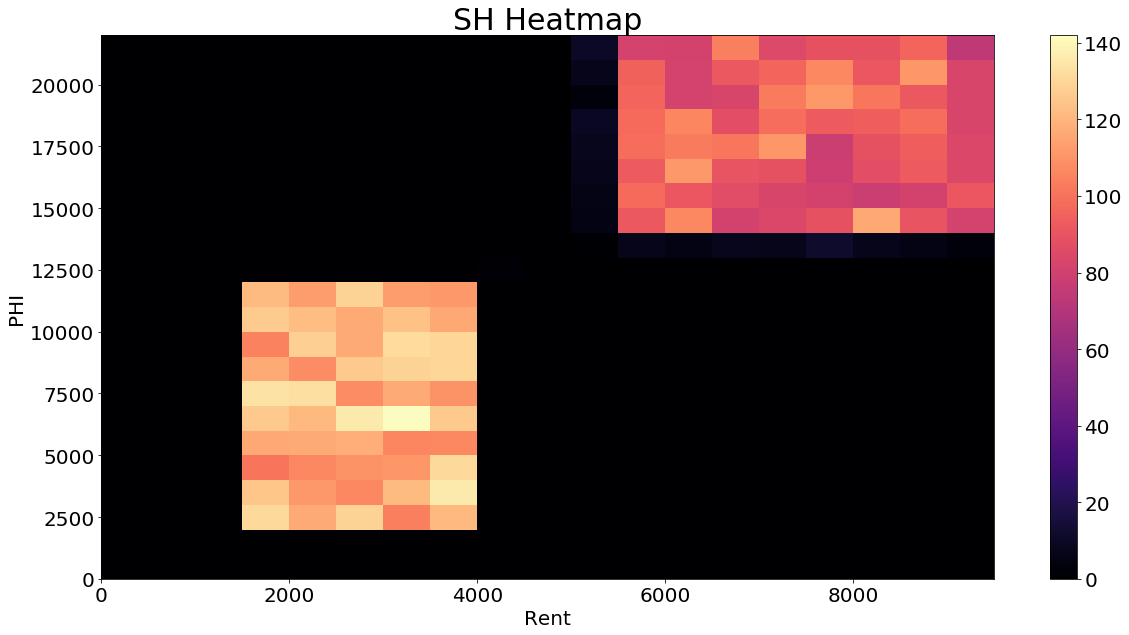

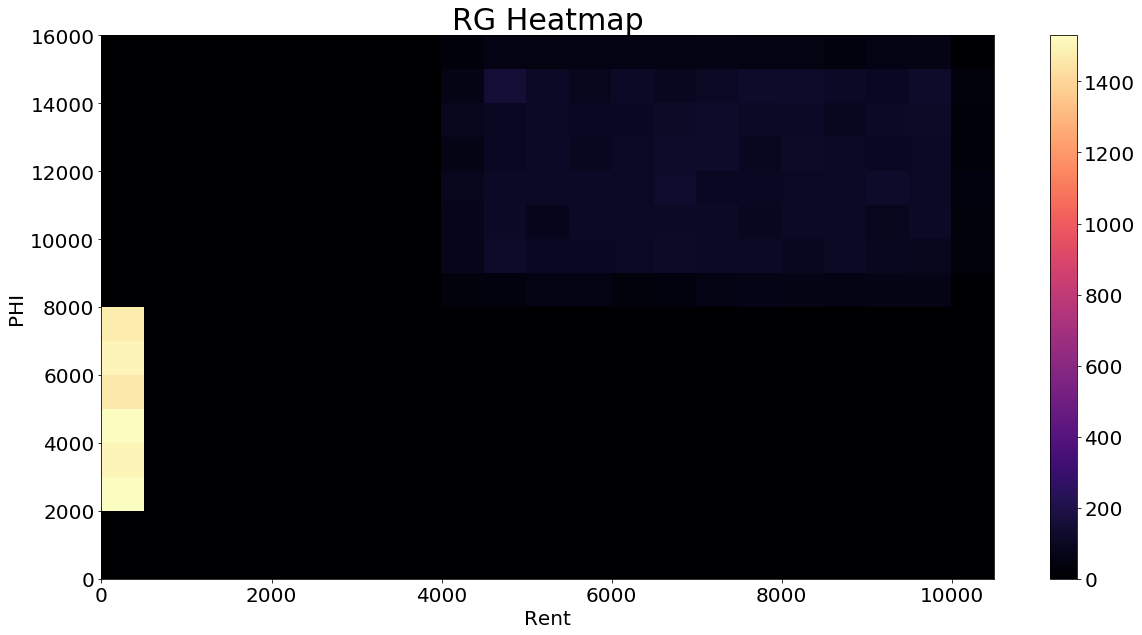

In [55]:
# got some help from a friend 

import matplotlib.pyplot as plt
import pandas as pd

rent_bin_width = 500
phi_bin_width = 1000

plt.figure(figsize=(20, 10))
rent_bins = np.arange(0, max(SH['values1']) + rent_bin_width, rent_bin_width)
phi_bins = np.arange(0, max(SH['PHI_values']) + phi_bin_width, phi_bin_width)
plt.hist2d(SH['values1'], SH['PHI_values'], bins=[rent_bins, phi_bins],cmap='magma')
plt.title("SH Heatmap", fontsize=30)
plt.xlabel("Rent", fontsize=20)
plt.ylabel("PHI", fontsize=20)
plt.rc('font', size=20) 
plt.colorbar()
plt.show()

plt.figure(figsize=(20, 10))
rent_bins = np.arange(0, max(RG['values1']) + rent_bin_width, rent_bin_width)
phi_bins = np.arange(0, max(RG['PHI_values']) + phi_bin_width, phi_bin_width)
plt.hist2d(RG['values1'], RG['PHI_values'], bins=[rent_bins, phi_bins],cmap='magma')
plt.title("RG Heatmap", fontsize=30)
plt.xlabel("Rent", fontsize=20)
plt.ylabel("PHI", fontsize=20)
plt.rc('font', size=20) 
plt.colorbar()
plt.show()

### Question 4 - Covariance and independence

#### 4.A
Define two random variables X and Y over the same probability space so that<br>
* E(X) = the sum of digits of the date you were born on (sum of all in DD/MM/YYYY)
* E(Y) = the sum of the two last digits of your id number

And so that X and Y are:
* NOT correlated (Cov(X,Y) = 0) and NOT independent.

In [241]:
import numpy as np
import pandas as pd
from itertools import product
from math import pow

print('Sum of digits:   E(X) = 2+3+0+1+1+9+8+8 = ' + str(2+3+0+1+1+9+8+8))
print('Last two digits: E(Y) = 7+9 = ' + str(7+9))
print()

# the probability space
ps_values = np.array([-1,1])
ps_proba = np.array([0.5,0.5])
ps_e = np.sum(np.multiply(ps_proba,ps_values))

# X
x = ps_values + (2+3+0+1+1+9+8+8) - ps_e
Ex = np.sum(np.multiply(ps_proba,x))
print('E(X) = ' + str(int(round(Ex))))


# Y
y = ps_values**2 + (7+9) - ps_e
Ey = np.sum(np.multiply(ps_proba,y))
print('E(Y) = ' + str(int(round(Ey))))

# Covariance 
print('Cov(x,y) = ' + str(int(np.cov(x,y)[0,1])))

Sum of digits:   E(X) = 2+3+0+1+1+9+8+8 = 32
Last two digits: E(Y) = 7+9 = 16

E(X) = 32
E(Y) = 17
Cov(x,y) = 0


#### 4.B
Can you define random variables that are independent and so that Cov(X,Y) > 0?<br>
Explain.


No. By Covariance property if X,Y are Independent variables they will have Cov(X,Y) = 0

$$ Cov(X,Y) = E\big((X-E(x))(Y-E(Y))\big) = $$
$$ = E\big( XY-XE(Y)-YE(X)+E(X)E(Y) \big) = $$
$$ by \space Linearity \space of \space expectation $$
$$ = E(XY)-E\big(XE(Y)\big) - E\big(YE(X)\big) + E\big(E(X)E(Y)\big) = $$
$$ = E(XY) - E(X)E(Y) - E(X)E(Y) + E(X)E(Y) = $$
$$ = E(XY) - E(X)E(Y) = $$
$$ for \space independent \space variables \space E(XY)=E(X)E(Y)$$
$$ = E(XY) - E(XY) = 0$$

### Question 5 - Convolutions

#### 5.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [3]:
# "write a program" => write a function
import numpy as np
import pandas as pd
from itertools import product
import matplotlib.pyplot as plt


'''
P ={ 'values':[...] , 'proba':[...] }
n = positive integer
'''
def NFoldConv(P , n):
    t = {}
    t['values'] = np.array(list(product(P['values'], repeat=n))).sum(axis=1)
    t['proba'] = np.prod(list(product(P['proba'], repeat=n)),axis=1)
    return pd.DataFrame(t).groupby(by='values').sum()

#### 5.B
Compute the distribution of the sum of the results of rolling a fair dice 8 times

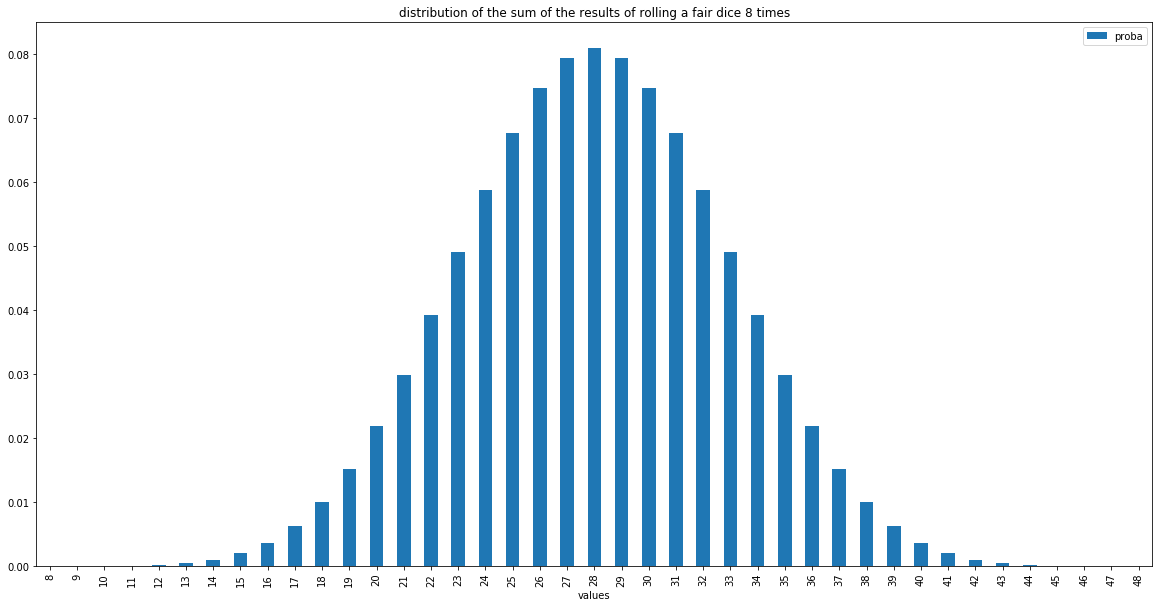

In [4]:
P = {}
P['values'] = np.array([1,2,3,4,5,6])
P['proba'] = np.array([1/6 for i in range(6)])
n = 8
df = NFoldConv(P,n)
df.plot.bar(figsize=(20,10),title='distribution of the sum of the results of rolling a fair dice 8 times')

#### 5.C
Assume that the price of a stock changes in any given day according to (in NIS):
$$P=\begin{pmatrix}
-1 & 0 & 1 & 2 & 3 \\
0.2 & 0.25 & 0.35 & 0.05 & 0.15
\end{pmatrix}$$

1. What is the distribution of the change in stock after 2 consecutive days of (independent) changes? After 5 consecutive days? 

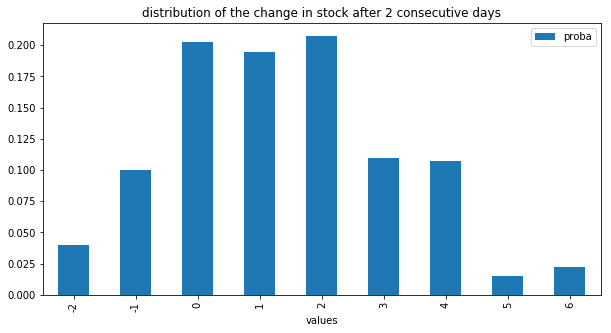

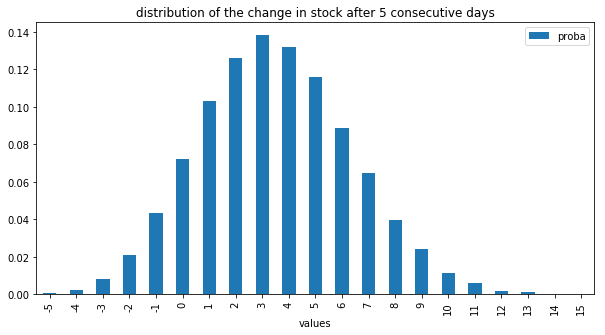

In [5]:
p = {}
p['values'] = np.array([-1,0,1,2,3])
p['proba'] = np.array([0.2,0.25,0.35,0.05,0.15])

NFoldConv(p,2).plot.bar(figsize=(10,5),title='distribution of the change in stock after 2 consecutive days')
NFoldConv(p,5).plot.bar(figsize=(10,5),title='distribution of the change in stock after 5 consecutive days')

2. What is the probability that the stock has gained strictly more than 7NIS after 5 days? Has lost strictly more than 7NIS?

In [6]:
df = NFoldConv(p,5).reset_index()
p5 = df[df['values']>7]['proba'].sum()
p7 = df[df['values']<-7]['proba'].sum()

print('the probability that the stock has gained strictly more than 7NIS after 5 days = ' + str(round(p5,4)))
print('the probability that the stock has lost strictly more than 7NIS = ' + str(round(p7,4)))

the probability that the stock has gained strictly more than 7NIS after 5 days = 0.0841
the probability that the stock has lost strictly more than 7NIS = 0.0


### Question 6 - Poisson mode

Let $X\sim{}Poi(λ)$<br>
#### 6.A
Find the mode of X and prove your calculation.

$$ Mode(X)=k, \space is \space when \space P(X=k) \space has \space the \space maximum \space value$$ 

$$ P(X=x) = \frac{\lambda^xe^{-\lambda}}{x!} = \frac{\lambda}{x} \frac{\lambda^{x-1}e^{-\lambda}}{(x-1)!}{} = \frac{\lambda}{x} P(X=x-1) \space therefore \space P(X=x) = \frac{\lambda}{x} P(X=x-1) $$

$$ 3 \space scenario \space proof:$$

$$ STEP1: \space If \space x<\lambda \space so \space \frac{\lambda}{x}>1 \space then \space P(X=x) > P(X=x-1) \space then \space Mode(X) \space is \space not \space x-1$$
$$ \text{and will continue increasing x=x+1 until } x>\lambda \space or \space x=\lambda$$

$$ STEP2: \space\space If \space x=\lambda \space so \space \frac{\lambda}{x}=1 \space then \space P(X=x) = P(X=x-1) \space then \space Mode(X) \space is \space x \space and \space x-1$$

$$ STEP3: \space Also \space if \space x>\lambda \space so \space \frac{\lambda}{x}<1 \space but \space x-1!=\lambda \space then \space P(X=x) < P(X=x-1) \space then \space \lambda \space must \space not \space be \space an \space integer \space so \space if \space Mode(X)=x-1=lower(\lambda)$$

<br>


$$Conclusion:$$

\begin{equation}
\\mode(X) =
\begin{cases} 
      \lambda - 1\,and\, \lambda & \text{if $\lambda$ is integer}, \\
      \lfloor\lambda\rfloor & \text{otherwise}
   \end{cases}
\end{equation}

#### 6.B
Plot the pdf of $X$ for $\lambda=4, \lambda=9.3, \lambda=25.8$.<br>
Show the following quantities on your plots:
* The mode of $X$
* The median of $X$
* $\mu(X)$

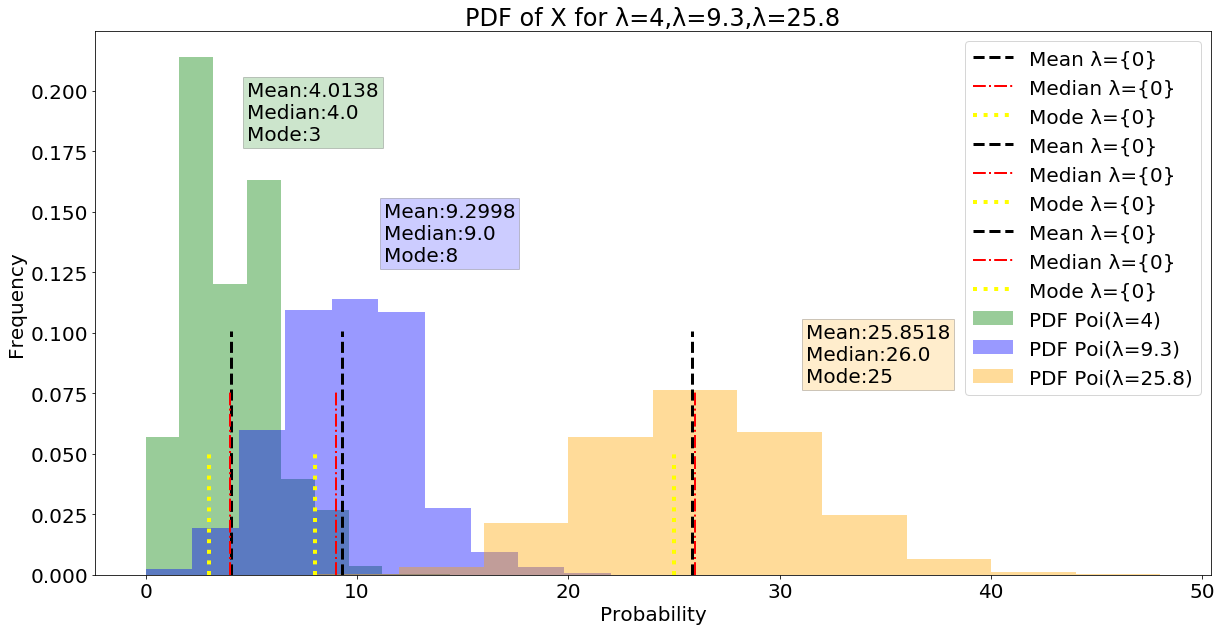

In [436]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

lambda_values = [4,9.3,25.8]
samples = [np.random.poisson(lam=l,size=10000) for l in lambda_values]
means = np.mean(samples,axis=1)
medians = np.median(samples,axis=1)
modes = stats.mode(samples,axis=1).mode.T[0]

colors = ['green','blue','orange']

plt.figure(figsize=(20, 10))
plt.rc('font', size=20) 
plt.title('PDF of X for λ=4,λ=9.3,λ=25.8')
plt.xlabel('Probability')
plt.ylabel('Frequency') 

for i in range(len(lambda_values)):
    # PLOT
    plt.hist(samples[i],10,alpha=0.4,density=True,label='PDF Poi(λ={0})'.format(lambda_values[i]),color=colors[i])  
   
    # Show quantities
    min_ylim, max_ylim = plt.ylim()
    plt.text(means[i]*1.2+i*0.1, max_ylim*0.8-i*0.05, 'Mean:{0}\nMedian:{1}\nMode:{2}'.format(means[i],medians[i],modes[i]),bbox=dict(facecolor=colors[i], alpha=0.2))
   
    # Quantities lines - in different styles so I would see them better due to overlapping
    plt.axvline(means[i], ymax=max_ylim*2, color='black', linestyle='--', linewidth=3,label='Mean λ={0}')
    plt.axvline(medians[i],ymax=max_ylim*1.5, color='red', linestyle='-.', linewidth=2,label='Median λ={0}')
    plt.axvline(modes[i],ymax=max_ylim, color='yellow', linestyle=':', linewidth=4,label='Mode λ={0}')

    
plt.legend()
plt.show()